In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.offline import iplot

In [2]:
data=pd.read_csv('/content/social_media_data.csv')

In [3]:
data.head()

,date,platform,post_type,likes,shares,comments,views
0,2023-05-24,Twitter,image,868.0,238.0,352.0,8836.0
1,2023-02-23,Twitter,image,944.0,610.0,146.0,5554.0
2,2023-03-18,Instagram,image,1067.0,858.0,365.0,4018.0
3,2023-06-12,Twitter,text,780.0,427.0,100.0,6999.0
4,2023-02-03,Instagram,text,836.0,893.0,443.0,5802.0


**Data Cleaning and formating**

In [4]:
data.dtypes

date          object
platform      object
post_type     object
likes        float64
shares       float64
comments     float64
views        float64
dtype: object

In [5]:
data.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of        date  platform  post_type  likes  shares  comments  views
0     False     False      False  False   False     False  False
1     False     False      False  False   False     False  False
2     False     False      False  False   False     False  False
3     False     False      False  False   False     False  False
4     False     False      False  False   False     False  False
...     ...       ...        ...    ...     ...       ...    ...
1995  False     False      False  False   False     False  False
1996  False     False      False  False   False     False  False
1997  False     False      False  False   False     False  False
1998  False     False      False  False   False     False  False
1999  False     False      False  False   False     False  False

[2000 rows x 7 columns]>

**What was the total number of likes, shares, comments, and views (for videos) over the year?**

In [6]:
# Filter rows where post_type is 'video'
video_df = data[data['post_type'] == 'video']

In [7]:
# Calculate the total number of likes, shares, comments, and views for videos
total_likes_for_videos = video_df['likes'].sum()
total_shares_for_videos = video_df['shares'].sum()
total_comments_for_videos = video_df['comments'].sum()
total_views_for_videos = video_df['views'].sum()

In [8]:
print(f'Total Likes for Videos: {total_likes_for_videos}')
print(f'Total Shares for Videos: {total_shares_for_videos}')
print(f'Total Comments for Videos: {total_comments_for_videos}')
print(f'Total Views for Videos: {total_views_for_videos}')

Total Likes for Videos: 816170.0
Total Shares for Videos: 311040.0
Total Comments for Videos: 194139.0
Total Views for Videos: 4464731.0


**Which platform had the highest engagement? (engagement = likes + shares + comments)**

In [9]:
data['engagement'] = data['likes'] + data['shares'] + data['comments']

# Group by platform and calculate the total engagement for each platform
platform_engagement = data.groupby('platform')['engagement'].sum()

In [10]:
max_engagement_platform = platform_engagement.idxmax()
highest_engagement = platform_engagement.max()

# Print the result
print(f'The platform with the highest engagement is "{max_engagement_platform}" '
      f'with a total engagement of {highest_engagement}')

The platform with the highest engagement is "Instagram" with a total engagement of 1405244.0


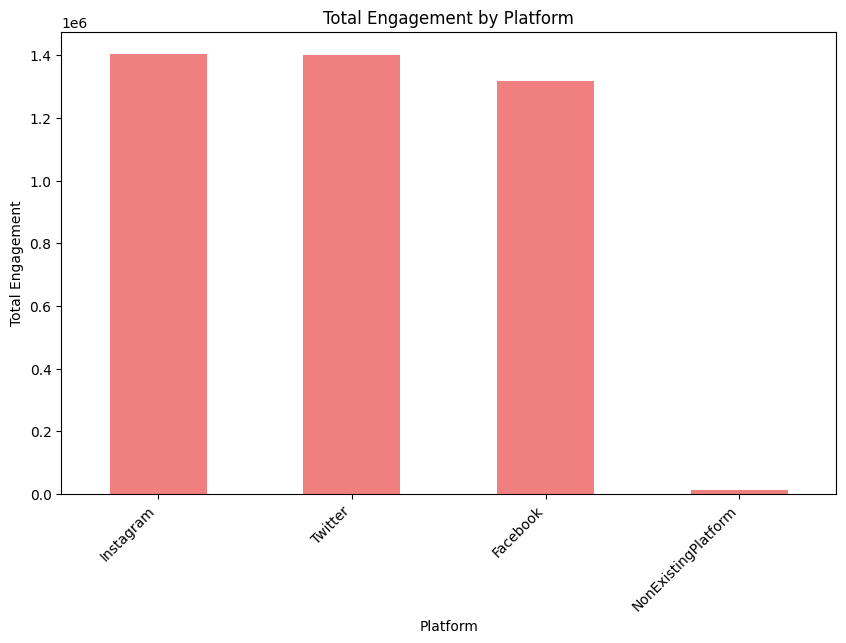

In [11]:
# Visualization
plt.figure(figsize=(10, 6))
platform_engagement.sort_values(ascending=False).plot(kind='bar', color='lightcoral')
plt.xlabel('Platform')
plt.ylabel('Total Engagement')
plt.title('Total Engagement by Platform')
plt.xticks(rotation=45, ha='right')
plt.show()

**What was the average number of likes, shares, comments, and views per post on each platform?**

In [12]:
average_metrics_per_platform = data.groupby('platform').agg({
    'likes': 'mean',
    'shares': 'mean',
    'comments': 'mean',
    'views': 'mean'
})

print('Average Metrics per Post on Each Platform:')
print(average_metrics_per_platform)

Average Metrics per Post on Each Platform:
                           likes      shares    comments        views
platform                                                             
Facebook             1289.982428  513.141494  311.160317  6984.239234
Instagram            1305.837278  497.372404  301.046062  6905.875556
NonExistingPlatform  1150.166667  515.833333  285.500000  6729.166667
Twitter              1274.994152  482.437775  305.857980  7013.258065


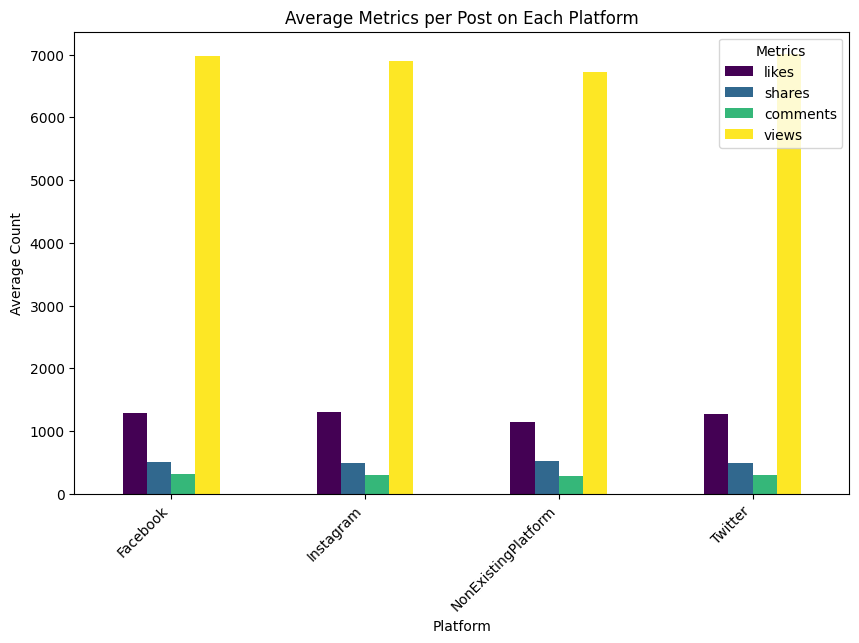

In [13]:
# Visualization
average_metrics_per_platform.plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.xlabel('Platform')
plt.ylabel('Average Count')
plt.title('Average Metrics per Post on Each Platform')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Metrics')
plt.show()

**What was the total number of each type of post (video, image, text) on each platform?**

In [14]:
# Group by both 'platform' and 'post_type' and calculate the count for each group
total_posts_by_type = data.groupby(['platform', 'post_type']).size().unstack(fill_value=0)

# Print the results
print('Total Number of Each Type of Post on Each Platform:')
print(total_posts_by_type)

Total Number of Each Type of Post on Each Platform:
post_type            image  text  video
platform                               
Facebook               218   204    209
Instagram              267   203    208
NonExistingPlatform      1     3      2
Twitter                249   219    217


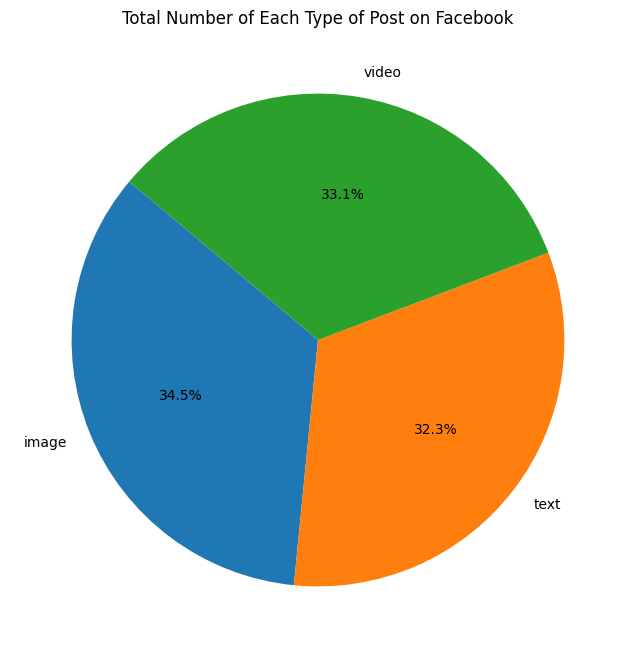

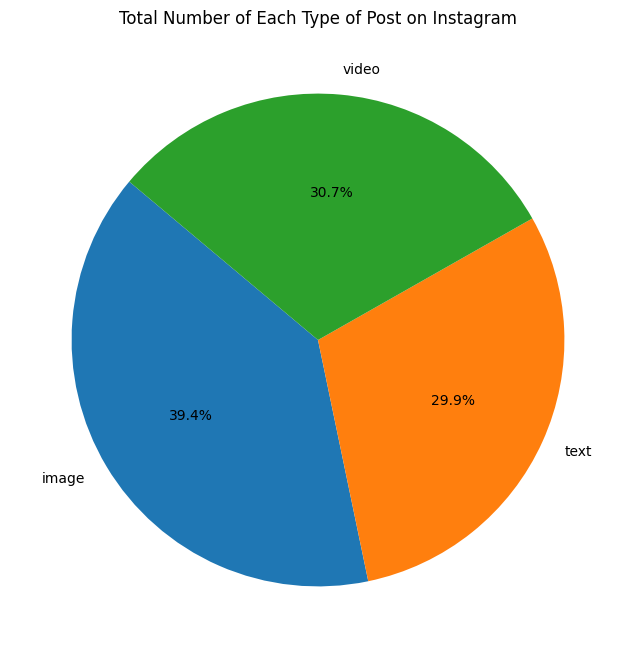

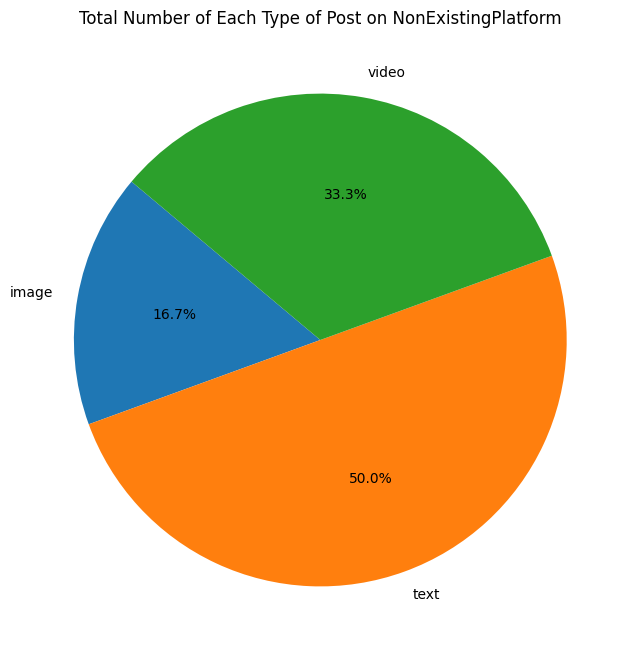

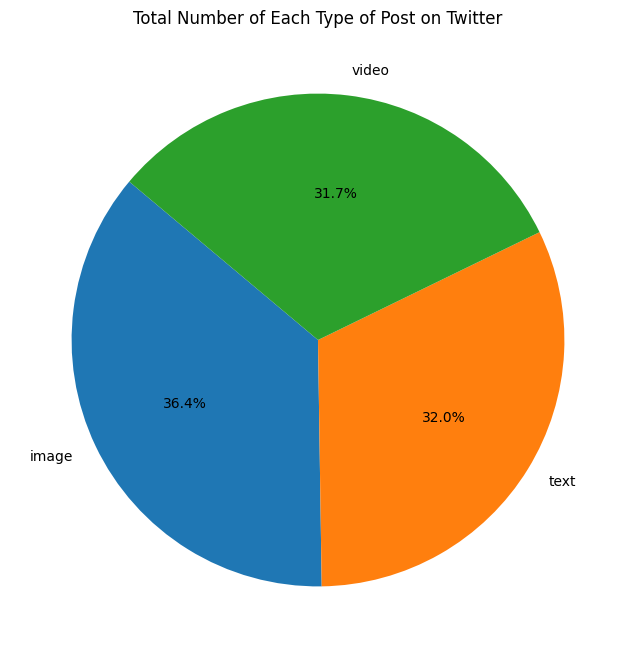

In [15]:
# Visualization
platforms = total_posts_by_type.index

for platform in platforms:
    platform_data = total_posts_by_type.loc[platform]

    plt.figure(figsize=(8, 8))
    plt.pie(platform_data, labels=platform_data.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Total Number of Each Type of Post on {platform}')
    plt.show()

**Which type of post had the highest average engagement?**

In [16]:
data['engagement'] = data['likes'] + data['shares'] + data['comments']

# Group by post_type and calculate the average engagement for each type
average_engagement_by_type = data.groupby('post_type')['engagement'].mean()

# Find the post type with the highest average engagement
max_engagement_type = average_engagement_by_type.idxmax()
highest_average_engagement = average_engagement_by_type.max()

# Print the result
print(f'The type of post with the highest average engagement is "{max_engagement_type}" '
      f'with an average engagement of {highest_average_engagement:.2f}')

The type of post with the highest average engagement is "text" with an average engagement of 2128.54


**What was the total engagement in each quarter of the year?**

In [18]:
data['engagement'] = data['likes'] + data['shares'] + data['comments']

# Convert the 'date' column to datetime
data['date'] = pd.to_datetime(data['date'])

# Set 'date' as the index
data.set_index('date', inplace=True)

# Resample the data by quarter and calculate the total engagement for each quarter
quarterly_engagement = data.resample('Q')['engagement'].sum()

# Print the result
print('Total Engagement in Each Quarter of the Year:')
print(quarterly_engagement)

Total Engagement in Each Quarter of the Year:
date
2022-12-31     938895.0
2023-03-31    1025381.0
2023-06-30    1000644.0
2023-09-30     978372.0
2023-12-31     192516.0
Freq: Q-DEC, Name: engagement, dtype: float64


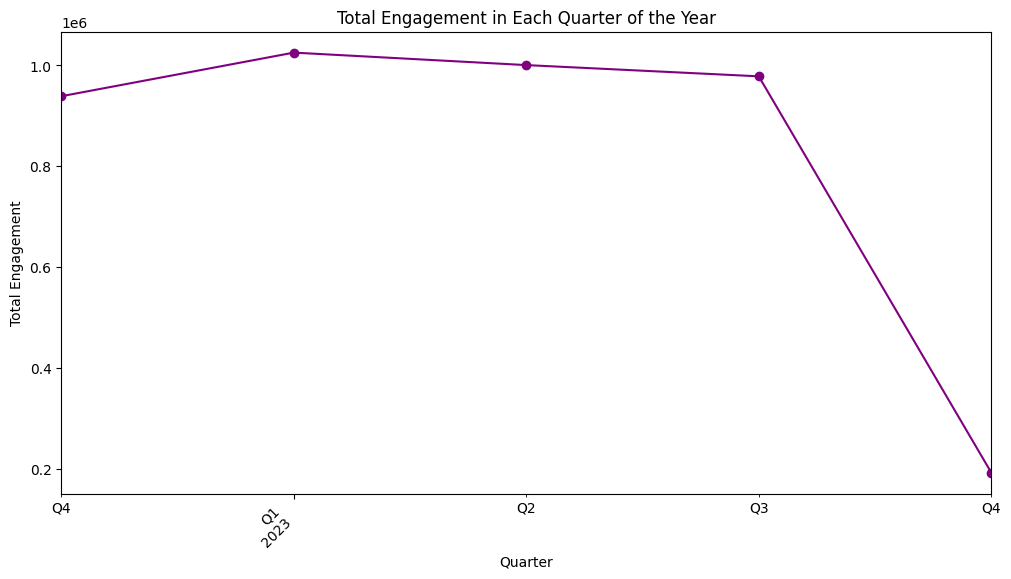

In [19]:
# Visualization
plt.figure(figsize=(12, 6))
quarterly_engagement.plot(kind='line', marker='o', color='purple')
plt.xlabel('Quarter')
plt.ylabel('Total Engagement')
plt.title('Total Engagement in Each Quarter of the Year')
plt.xticks(rotation=45, ha='right')
plt.show()